## data load

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import scanpy as sc
#import STALocator
import scipy.sparse as sp
import torch
from datetime import datetime
# 创建标准化目录结构
experiment_path = "PDAC"
model_path = os.path.join(experiment_path, "models")
data_path = os.path.join(experiment_path, "data")
result_path = os.path.join(experiment_path, "results")
os.makedirs(model_path, exist_ok=True)
os.makedirs(data_path, exist_ok=True)
os.makedirs(result_path, exist_ok=True)
# 读取数据（保持原始代码不变）
# --------------------------------------------------
st_data_path = '/home/qyyuan/project/ST_GRN/data/PDAC'
count_ST = pd.read_csv(os.path.join(st_data_path, "GSM3036911_PDAC-A-ST1-filtered.txt"), sep="\t", index_col=0)
count_ST = count_ST[~count_ST.index.duplicated(keep='first')]
count_ST=count_ST.T
adata_ST = sc.AnnData(count_ST)
import pandas as pd
import numpy as np
# 2. 从行索引中提取坐标
# 行索引目前是 '6x2', '9x3' 这样的字符串
index_names = count_ST.index
# 使用字符串分割，'x' 作为分隔符
# 分割后，将结果转换为整数，并分别赋值给新的列
x_coords = [int(name.split('x')[0]) for name in index_names]
y_coords = [int(name.split('x')[1]) for name in index_names]

# 创建两列的空间坐标数组
spatial_coords = np.column_stack([x_coords, y_coords])
adata_ST.obsm["spatial"] = spatial_coords
# 现在您的数据框 df 中多了两列明确的数值坐标：
# image_col 对应原来的第一个数字（如6）
# image_row 对应原来的第二个数字（如2）
# sc_data_path = "/project/zduren/durenlab/palmetto/Kaya/ST/STALocator/tutorials/"
# meta_sc = pd.read_csv(os.path.join(sc_data_path, "patient_metadata_new.txt"), sep="\t", index_col=0)


In [60]:
count_ST

Genes,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
10x10,0,0,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
10x13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
10x14,0,0,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10x15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10x16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x29,0,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9x30,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9x31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9x32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

st_data_path = '/home/qyyuan/project/ST_GRN/data/PDAC/'
experiment_path = '/home/qyyuan/project/ST_GRN/data/PDAC/'

# 读取数据
file_path = "GSE111672_PDAC-A-indrop-filtered-expMat.txt"

# 方法：先获取原始列名，然后读取数据
with open(st_data_path+file_path, 'r') as f:
    header = f.readline().strip().split('\t')
original_columns = header[1:]  # 基因名（跳过索引列）

# 读取数据
count_df = pd.read_csv(st_data_path+file_path, sep="\t", index_col=0)

# 恢复原始列名（避免pandas自动添加 .1, .2 等后缀）
count_df.columns = original_columns

# 提取细胞类型信息（现在列名应该是原始的，没有重复处理）
cell_types = count_df.columns.tolist()

# 为细胞生成新的名称 C1, C2, ..., CN
new_cell_names = [f"C{i+1}" for i in range(len(cell_types))]

# 创建细胞元数据
cell_metadata = pd.DataFrame({
    'original_cell_type': cell_types,
    'cell_id': new_cell_names
}, index=new_cell_names)
count_df = count_df[~count_df.index.duplicated(keep='first')]

count_df = count_df.T
count_df.index = new_cell_names

# 创建AnnData对象
adata_sc = sc.AnnData(count_df)

# 添加细胞元数据
adata_sc.obs['celltype'] = cell_metadata['original_cell_type']
adata_sc.obs['cell_id'] = cell_metadata['cell_id']

# 保存数据（修复变量名错误）
adata_sc.write(experiment_path+'/adata_PDAC_sc.h5ad')

print("数据处理完成！")
print(f"数据形状: {adata_sc.shape}")
print(f"前5个细胞类型: {adata_sc.obs['celltype'].head().tolist()}")

数据处理完成！
数据形状: (1926, 19736)
前5个细胞类型: ['Acinar cells', 'Ductal - terminal ductal like', 'Ductal - terminal ductal like', 'Ductal - CRISP3 high/centroacinar like', 'Cancer clone A']


In [24]:
count_df

Genes,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
C3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
C4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,4,0,0
C5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
adata_ST

AnnData object with n_obs × n_vars = 428 × 19736
    obsm: 'spatial'

## functions

In [9]:
# Modified from Portal:
# Zhao J, et al. (2022) Adversarial domain translation networks for integrating large-scale atlas-level single-cell datasets. Nature Computational Science 2(5):317-330.

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class encoder(nn.Module):
    def __init__(self, n_input, n_latent):
        super(encoder, self).__init__()
        self.n_input = n_input
        self.n_latent = n_latent
        n_hidden = 512

        self.W_1 = nn.Parameter(torch.Tensor(n_hidden, self.n_input).normal_(mean=0.0, std=0.1))
        self.b_1 = nn.Parameter(torch.Tensor(n_hidden).normal_(mean=0.0, std=0.1))

        self.W_2 = nn.Parameter(torch.Tensor(self.n_latent, n_hidden).normal_(mean=0.0, std=0.1))
        self.b_2 = nn.Parameter(torch.Tensor(self.n_latent).normal_(mean=0.0, std=0.1))

    def forward(self, x):
        h = F.relu(F.linear(x, self.W_1, self.b_1))
        z = F.linear(h, self.W_2, self.b_2)
        return z

class generator(nn.Module):
    def __init__(self, n_input, n_latent):
        super(generator, self).__init__()
        self.n_input = n_input
        self.n_latent = n_latent
        n_hidden = 512

        self.W_1 = nn.Parameter(torch.Tensor(n_hidden, self.n_latent).normal_(mean=0.0, std=0.1))
        self.b_1 = nn.Parameter(torch.Tensor(n_hidden).normal_(mean=0.0, std=0.1))

        self.W_2 = nn.Parameter(torch.Tensor(self.n_input, n_hidden).normal_(mean=0.0, std=0.1))
        self.b_2 = nn.Parameter(torch.Tensor(self.n_input).normal_(mean=0.0, std=0.1))

    def forward(self, z):
        h = F.relu(F.linear(z, self.W_1, self.b_1))
        x = F.linear(h, self.W_2, self.b_2)
        return x

class discriminator(nn.Module):
    def __init__(self, n_input):
        super(discriminator, self).__init__()
        self.n_input = n_input
        n_hidden = 512

        self.W_1 = nn.Parameter(torch.Tensor(n_hidden, self.n_input).normal_(mean=0.0, std=0.1))
        self.b_1 = nn.Parameter(torch.Tensor(n_hidden).normal_(mean=0.0, std=0.1))

        self.W_2 = nn.Parameter(torch.Tensor(n_hidden, n_hidden).normal_(mean=0.0, std=0.1))
        self.b_2 = nn.Parameter(torch.Tensor(n_hidden).normal_(mean=0.0, std=0.1))

        self.W_3 = nn.Parameter(torch.Tensor(1, n_hidden).normal_(mean=0.0, std=0.1))
        self.b_3 = nn.Parameter(torch.Tensor(1).normal_(mean=0.0, std=0.1))

    def forward(self, x):
        h = F.relu(F.linear(x, self.W_1, self.b_1))
        h = F.relu(F.linear(h, self.W_2, self.b_2))
        score = F.linear(h, self.W_3, self.b_3)
        return torch.clamp(score, min=-50.0, max=50.0)

class encoder_site(nn.Module):
    def __init__(self, n_input, n_latent):
        super(encoder_site, self).__init__()
        self.n_input = n_input
        self.n_latent = n_latent
        n_hidd_1 = 1000
        n_hidd_2 = 500
        n_hidd_3 = 50
        n_hidd_4 = 10

        self.fc1 = nn.Linear(n_input, n_hidd_1)
        self.fc1_bn = nn.BatchNorm1d(n_hidd_1)
        self.fc2 = nn.Linear(n_hidd_1, n_hidd_2)
        self.fc2_bn = nn.BatchNorm1d(n_hidd_2)
        self.fc3 = nn.Linear(n_hidd_2, n_hidd_3)
        self.fc3_bn = nn.BatchNorm1d(n_hidd_3)
        self.fc4 = nn.Linear(n_hidd_3, n_hidd_4)
        self.fc4_bn = nn.BatchNorm1d(n_hidd_4)
        self.fc5 = nn.Linear(n_hidd_4, n_latent)

    def forward(self, input):
        h1 = F.relu(self.fc1_bn(self.fc1(input)))
        h2 = F.relu(self.fc2_bn(self.fc2(h1)))
        h3 = F.relu(self.fc3_bn(self.fc3(h2)))
        h4 = F.relu(self.fc4_bn(self.fc4(h3)))
        #return F.relu(self.fc5(h4))
        return self.fc5(h4)

class decoder_site(nn.Module):
    def __init__(self, n_input, n_latent):
        super(decoder_site, self).__init__()
        self.n_input = n_input
        self.n_latent = n_latent
        n_hidd_6 = 10
        n_hidd_7 = 50
        n_hidd_8 = 500
        n_hidd_9 = 1000

        self.fc6 = nn.Linear(n_latent, n_hidd_6)
        self.fc6_bn = nn.BatchNorm1d(n_hidd_6)
        self.fc7 = nn.Linear(n_hidd_6, n_hidd_7)
        self.fc7_bn = nn.BatchNorm1d(n_hidd_7)
        self.fc8 = nn.Linear(n_hidd_7, n_hidd_8)
        self.fc8_bn = nn.BatchNorm1d(n_hidd_8)
        self.fc9 = nn.Linear(n_hidd_8, n_hidd_9)
        self.fc9_bn = nn.BatchNorm1d(n_hidd_9)
        self.fc10 = nn.Linear(n_hidd_9, n_input)

    def forward(self, z):
        h6 = F.relu(self.fc6_bn(self.fc6(z)))
        h7 = F.relu(self.fc7_bn(self.fc7(h6)))
        h8 = F.relu(self.fc8_bn(self.fc8(h7)))
        h9 = F.relu(self.fc9_bn(self.fc9(h8)))
        return self.fc10(h9)

In [10]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import anndata

import ot

import torch
import torch.nn as nn
import torch.nn.functional as F

loss1 = nn.L1Loss()
loss2 = nn.MSELoss()

def get_max_index(
    vector
):
    """This function Returns the index of the vector's maximum value.

        Args:
            vector: A vector that store values.

        Return:
            max_index: The index of the vector's maximum value.
    """
    max_index=np.where(vector==np.max(vector))[0][0]
    return max_index

def trans_plan_b(
    latent_A,
    latent_B,
    metric='correlation',
    reg=0.1,
    numItermax=10,
    device='cpu'
):
    """This function Returns the optimal transport (OT) plan.

        Args:
            latent_A, latent_B: Two set of data points.
            metric: Metric of OT. Default is 'correlation'.
            reg: The weight of entropy regularized term. Default is 0.1.
            numItermax: Iterations of OT. Default is 10.

        Return:
            plan: The index of the vector's maximum value.
    """
    cost = ot.dist(latent_A.detach().cpu().numpy(), latent_B.detach().cpu().numpy(), metric=metric)
    cost = torch.from_numpy(cost).float().to(device)

    length_A = latent_A.shape[0]
    length_B = latent_B.shape[0]

    P = torch.exp(-cost/reg)

    p_s = torch.ones(length_A, 1) / length_A
    p_t = torch.ones(length_B, 1) / length_B
    p_s = p_s.to(device)
    p_t = p_t.to(device)

    u_s = torch.ones(length_A, 1) / length_A
    u_t = torch.ones(length_B, 1) / length_B
    u_s = u_s.to(device)
    u_t = u_t.to(device)

    for i in range(numItermax):
        p_t = u_t / torch.mm(torch.transpose(P, 0, 1), p_s)
        p_s = u_s / torch.mm(P, p_t)

    plan = torch.transpose(p_t, 0, 1) * P * p_s

    return plan

def rand_projections(
    embedding_dim,
    num_samples=50,
    device='cpu'
):
    """This function generates `num_samples` random samples from the latent space's unit sphere.

        Args:
            embedding_dim (int): embedding dimensionality
            num_samples (int): number of random projection samples

        Return:
            torch.Tensor: tensor of size (num_samples, embedding_dim)
    """

    projections = [w / np.sqrt((w**2).sum())  # L2 normalization
                   for w in np.random.normal(size=(num_samples, embedding_dim))]
    projections = np.asarray(projections)
    return torch.from_numpy(projections).type(torch.FloatTensor).to(device)


def _sliced_wasserstein_distance(
    encoded_samples,
    distribution_samples,
    num_projections=50,
    p=2,
    device='cpu'
):
    """ Sliced Wasserstein Distance between encoded samples and drawn distribution samples.

        Args:
            encoded_samples (toch.Tensor): tensor of encoded training samples
            distribution_samples (torch.Tensor): tensor of drawn distribution training samples
            num_projections (int): number of projections to approximate sliced wasserstein distance
            p (int): power of distance metric
            device (torch.device): torch device (default 'cpu')

        Return:
            torch.Tensor: tensor of wasserstrain distances of size (num_projections, 1)
    """

    # derive latent space dimension size from random samples drawn from latent prior distribution
    embedding_dim = distribution_samples.size(1)
    # generate random projections in latent space
    projections = rand_projections(embedding_dim, num_projections).to(device)
    # calculate projections through the encoded samples
    encoded_projections = encoded_samples.matmul(projections.transpose(0, 1).to(device))
    # calculate projections through the prior distribution random samples
    distribution_projections = (distribution_samples.matmul(projections.transpose(0, 1)))
    # calculate the sliced wasserstein distance by
    # sorting the samples per random projection and
    # calculating the difference between the
    # encoded samples and drawn random samples
    # per random projection
    wasserstein_distance = (torch.sort(encoded_projections.transpose(0, 1), dim=1)[0] -
                            torch.sort(distribution_projections.transpose(0, 1), dim=1)[0])
    # distance between latent space prior and encoded distributions
    # power of 2 by default for Wasserstein-2
    wasserstein_distance = torch.pow(wasserstein_distance, p)
    # approximate mean wasserstein_distance for each projection
    return wasserstein_distance.mean()


def sliced_wasserstein_distance(
    encoded_samples,
    transformed_samples,
    num_projections=50,
    p=2,
    device='cpu'
):
    """ Sliced Wasserstein Distance between encoded samples and drawn distribution samples.

        Args:
            encoded_samples (toch.Tensor): tensor of encoded training samples
            distribution_samples (torch.Tensor): tensor of drawn distribution training samples
            num_projections (int): number of projections to approximate sliced wasserstein distance
            p (int): power of distance metric
            device (torch.device): torch device (default 'cpu')

        Return:
            torch.Tensor: tensor of wasserstrain distances of size (num_projections, 1)
    """
    swd = _sliced_wasserstein_distance(encoded_samples, transformed_samples, num_projections, p, device)
    return swd

## ours

In [170]:
# Modified from Portal:
# Zhao J, et al. (2022) Adversarial domain translation networks for integrating large-scale atlas-level single-cell datasets. Nature Computational Science 2(5):317-330.
import os
import time
import numpy as np
import scanpy as sc
import pandas as pd
import tables
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.decomposition import PCA, IncrementalPCA
import scipy.sparse as sp
from scipy.spatial.distance import cdist
from tqdm import tqdm

class Model3(object):
    def __init__(self,
                 beta=1.0,
                 lambda_Lasso=0.1,
                 resolution = "low", # Resolution of ST dataset. Available options are: "low" and "high".
                 batch_size = 500, # Batch size.
                 train_epoch = 5000, # Epochs.
                 cut_steps = 0.5, # Switch location between integration network and localization network training.
                 seed = 1234, # Random seed.
                 npcs = 30, # Number of top PCs.
                 n_latent = 20, # Dimension of shared latent space on integration network.
                 n_coord = 2, # Dimension of spatial location.
                 sf_coord = 12000, # scaling factor of spatial location.
                 location = "spatial", # storing location of spatial location.
                 rad_cutoff = None, # The distance of the location cell from the nearest spot is used to filter out cells located outside the tissue section.
                 lambdaGAN = 1.0, # The weight of adversarial learning loss on integration network.
                 lambdacos = 20.0, # The weight of cosine similarity on integration network.
                 lambdaAE = 10.0, # The weight of auto-encoder consistency on integration network.
                 lambdaLA = 10.0, # The weight of latent alignment loss on integration network.
                 lambdaSWD = 5.0, # The weight of sliced Wasserstein distance on integration network.
                 lambdalat = 1.0, # The weight of spatial location fitting loss on localization network.
                 lambdarec = 0.01, # The weight of reconstruction loss on localization network.
                 model_path = "models", # Model save path.
                 data_path = "data", # Data save path.
                 result_path = "results", # Result save path.
                 ot = True, # Whether to perform minibatch optimal transport. Available options are: True and False.
                 verbose = True, # Whether to print running information. Available options are: True and False.
                 device = "cpu" # The device of model running. Specific graphic card should be specified if use GPU.
                 ):

        # set random seed
        torch.manual_seed(seed)
        np.random.seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.benchmark = True

        if resolution not in ['low', 'high']:
            raise ValueError("Resolution must be either 'low' or 'high'.")

        if resolution == "high" and not ot:
            raise ValueError("If resolution is 'high', ot must be True.")

        self.resolution = resolution
        self.batch_size = batch_size
        self.train_epoch = train_epoch
        if self.resolution == "low":
            self.cut_steps = cut_steps
        elif self.resolution == "high":
            self.cut_steps = 1

        self.npcs = npcs
        self.n_latent = n_latent
        self.n_coord = n_coord
        self.sf_coord = sf_coord
        self.location = location
        self.rad_cutoff = rad_cutoff
        self.beta = beta
        self.lambda_Lasso = lambda_Lasso
        self.lambdaGAN = lambdaGAN
        self.lambdacos = lambdacos
        self.lambdaAE = lambdaAE
        self.lambdaLA = lambdaLA
        self.lambdaSWD = lambdaSWD
        # 在 __init__ 中加上这几行：

        self.lambdalat = lambdalat
        self.lambdarec = lambdarec

        self.margin = 5.0

        self.model_path = model_path
        self.data_path = data_path
        self.result_path = result_path

        self.ot = ot
        self.verbose = verbose
        self.device = device


    def preprocess(self,
                   adata_A_input, # Anndata object of scRNA-seq data
                   adata_B_input, # Anndata object of ST data
                   hvg_num = 4000, # Number of highly variable genes for each anndata
                   save_embedding = False, # Save low-dimensional embeddings or not
                   res=1.0
                   ):
        adata_A_input.obs["batch"] = "scRNA-seq"
        adata_B_input.obs["batch"] = "ST"
        adata_A = adata_A_input.copy()
        adata_B = adata_B_input.copy()
        if self.verbose:
            print("Finding highly variable genes...")
        sc.pp.highly_variable_genes(adata_A, flavor='seurat_v3', n_top_genes=hvg_num)
        sc.pp.highly_variable_genes(adata_B, flavor='seurat_v3', n_top_genes=hvg_num)
        hvg_A = adata_A.var[adata_A.var.highly_variable == True].sort_values(by="highly_variable_rank").index
        hvg_B = adata_B.var[adata_B.var.highly_variable == True].sort_values(by="highly_variable_rank").index
        hvg_total = hvg_A.intersection(hvg_B)
        print('# overlap highly variable genes is: '+str(len(hvg_total)))
        if len(hvg_total) < 100:
            raise ValueError("The total number of highly variable genes is smaller than 100 (%d). Try to set a larger hvg_num." % len(hvg_total))
        if self.verbose:
            print("Normalizing and scaling...")
        sc.pp.normalize_total(adata_A, target_sum=1e4)
        sc.pp.log1p(adata_A)
        adata_A0=adata_A.copy()
        sc.tl.pca(adata_A0)
        sc.pp.neighbors(adata_A0)
        sc.tl.umap(adata_A0)
        # Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
        sc.tl.leiden(adata_A0, resolution=res)
        cluster_labels = adata_A0.obs['leiden'].values
        K=len(set(cluster_labels))
        adata_A = adata_A[:, hvg_total]
        sc.pp.scale(adata_A, max_value=10)
        sc.pp.normalize_total(adata_B, target_sum=1e4)
        sc.pp.log1p(adata_B)
        adata_B = adata_B[:, hvg_total]
        sc.pp.scale(adata_B, max_value=10)
        adata_total = adata_A.concatenate(adata_B, index_unique=None)
        if self.verbose:
            print("Dimensionality reduction via PCA...")
        pca = PCA(n_components=self.npcs, svd_solver="arpack", random_state=0)
        adata_total.obsm["X_pca"] = pca.fit_transform(adata_total.X)
        self.emb_A = adata_total.obsm["X_pca"][:adata_A.shape[0], :self.npcs].copy()
        self.emb_B = adata_total.obsm["X_pca"][adata_A.shape[0]:, :self.npcs].copy()
        temp = adata_B.obsm[self.location][:, :self.n_coord].copy()
        self.coord_B = (temp-temp.min(axis=0))/(temp.max(axis=0)-temp.min(axis=0))
        self.adata_total = adata_total
        self.adata_A_input = adata_A_input
        self.adata_B_input = adata_B_input
        if not os.path.exists(self.data_path):
            os.makedirs(self.data_path)
        if save_embedding:
            np.save(os.path.join(self.data_path, "lowdim_A.npy"), self.emb_A)
            np.save(os.path.join(self.data_path, "lowdim_B.npy"), self.emb_B)
        return K,cluster_labels

    def train(self,training_idx_rna,training_idx_st,K,cluster_labels,
              num_projections = 500, # The same as sliced_wasserstein_distance function and _sliced_wasserstein_distance function.
              metric = 'correlation', # The same as trans_plan_b function.
              reg = 0.1, # The same as trans_plan_b function.
              numItermax = 10 # The same as trans_plan_b function.
              ):
        begin_time = time.time()
        if self.verbose:
            print("Begining time: ", time.asctime(time.localtime(begin_time)))
        self.E_A = encoder(self.npcs, self.n_latent).to(self.device)
        self.E_B = encoder(self.npcs, self.n_latent).to(self.device)
        self.G_A = generator(self.npcs, self.n_latent).to(self.device)
        self.G_B = generator(self.npcs, self.n_latent).to(self.device)
        self.D_A = discriminator(self.npcs).to(self.device)
        self.D_B = discriminator(self.npcs).to(self.device)
        self.E_s = encoder_site(self.n_latent, self.n_coord).to(self.device)
        self.D_s = decoder_site(self.n_latent, self.n_coord).to(self.device) 
        self.K = K
        self.cluster_labels = cluster_labels
        x_A = torch.from_numpy(self.emb_A).float().to(self.device)
        z_A = self.E_A(x_A)
        # 将 z_A 转换为 DataFrame 并添加标签列
        df = pd.DataFrame(z_A.detach().numpy())
        df.index = self.cluster_labels
        # 按标签分组并计算每组的均值
        mean_values = df.groupby(df.index).mean().values
        self.phi = nn.Parameter(torch.ones(self.K)/self.K, requires_grad=True).to(self.device)
        self.mu = nn.Parameter(torch.tensor(mean_values), requires_grad=True).to(self.device)
        self.sigma = nn.Parameter(torch.eye(self.n_latent).unsqueeze(0).repeat(self.K, 1, 1), requires_grad=True).to(self.device)
        #print(z_A.shape,x_A.shape,self.mu.shape,K)
        params_G = list(self.E_A.parameters()) + list(self.E_B.parameters()) + list(self.G_A.parameters()) + \
        list(self.G_B.parameters())+[self.mu,self.phi]
        params_S = list(self.E_s.parameters()) + list(self.D_s.parameters())
        optimizer_G = optim.Adam(params_G, lr=0.001, weight_decay=0.)
        optimizer_S = optim.Adam(params_S, lr=0.001, weight_decay=0.)
        params_D = list(self.D_A.parameters()) + list(self.D_B.parameters())
        optimizer_D = optim.Adam(params_D, lr=0.001, weight_decay=0.)
        self.E_A.train()
        self.E_B.train()
        self.G_A.train()
        self.G_B.train()
        self.E_s.train()
        self.D_s.train()
        self.D_A.train()
        self.D_B.train()
        def gmm_log_likelihood(z):
            """计算GMM负对数似然（公式15）"""
            z = z.unsqueeze(1)  # [batch, 1, latent]
            #print(z.shape,self.mu.shape,self.phi.shape)
            diff = z - self.mu  # [batch, K, latent]
            cov_inv = torch.stack([torch.inverse(s) for s in self.sigma])  # [K, latent, latent]
            #print(z.shape,diff.shape,self.sigma.shape,self.phi.shape)
            exponent = -0.5 * torch.einsum('bki,kij,bkj->bk', diff, cov_inv, diff)        
            log_prob = exponent - 0.5 * torch.logdet(self.sigma).unsqueeze(0) + torch.log(self.phi)
            return -torch.logsumexp(log_prob, dim=1).mean()  # 负对数似然
        N_A = len(training_idx_rna)
        N_B = len(training_idx_st)
        if self.ot:
            plan = np.ones(shape=(N_A, N_B))
            plan = plan / (self.batch_size * self.batch_size)
            plan = torch.from_numpy(plan).float().to(self.device)

        for j in range(self.train_epoch):
            index_A = np.random.choice(training_idx_rna, size=self.batch_size)
            index_B = np.random.choice(training_idx_st, size=self.batch_size)
            x_A = torch.from_numpy(self.emb_A[index_A, :]).float().to(self.device)
            x_B = torch.from_numpy(self.emb_B[index_B, :]).float().to(self.device)
            c_B = torch.from_numpy(self.coord_B[index_B, :]).float().to(self.device)#真实的细胞位置
            z_A = self.E_A(x_A)
            z_B = self.E_B(x_B)
            m_B = self.E_s(z_B)
            s_Brecon = self.D_s(m_B)
            x_AtoB = self.G_B(z_A)
            x_BtoA = self.G_A(z_B)
            x_Arecon = self.G_A(z_A)
            x_Brecon = self.G_B(z_B)
            z_AtoB = self.E_B(x_AtoB)
            z_BtoA = self.E_A(x_BtoA)
            if j < int(self.train_epoch*self.cut_steps):
                optimizer_D.zero_grad()
                if j <= 5:
                    # Warm-up
                    loss_D_A = (torch.log(1 + torch.exp(-self.D_A(x_A))) + torch.log(
                        1 + torch.exp(self.D_A(x_BtoA)))).mean()
                    loss_D_B = (torch.log(1 + torch.exp(-self.D_B(x_B))) + torch.log(
                        1 + torch.exp(self.D_B(x_AtoB)))).mean()
                else:
                    loss_D_A = (torch.log(
                        1 + torch.exp(-torch.clamp(self.D_A(x_A), -self.margin, self.margin))) + torch.log(
                        1 + torch.exp(torch.clamp(self.D_A(x_BtoA), -self.margin, self.margin)))).mean()
                    loss_D_B = (torch.log(
                        1 + torch.exp(-torch.clamp(self.D_B(x_B), -self.margin, self.margin))) + torch.log(
                        1 + torch.exp(torch.clamp(self.D_B(x_AtoB), -self.margin, self.margin)))).mean()
                loss_D = loss_D_A + loss_D_B
                loss_D.backward(retain_graph=True)
                optimizer_D.step()
                loss_AE_A = torch.mean((x_Arecon - x_A) ** 2)
                loss_AE_B = torch.mean((x_Brecon - x_B) ** 2)
                loss_AE = loss_AE_A + loss_AE_B
                loss_cos_A = (1 - torch.sum(F.normalize(x_AtoB, p=2) * F.normalize(x_A, p=2), 1)).mean()
                loss_cos_B = (1 - torch.sum(F.normalize(x_BtoA, p=2) * F.normalize(x_B, p=2), 1)).mean()
                loss_cos = loss_cos_A + loss_cos_B

                loss_LA_AtoB = torch.mean((z_A - z_AtoB) ** 2)
                loss_LA_BtoA = torch.mean((z_B - z_BtoA) ** 2)
                loss_LA = loss_LA_AtoB + loss_LA_BtoA

                loss_SWD = sliced_wasserstein_distance(z_A, z_B, num_projections=num_projections, device=self.device)

                if self.ot:
                    plan_tmp = trans_plan_b(z_A, z_B, metric=metric, reg=reg, numItermax=numItermax, device=self.device)

                    coord_list = [[i, j] for i in index_A for j in index_B]
                    coord_list = np.array(coord_list)
                    plan[coord_list[:, 0], coord_list[:, 1]] = plan_tmp.reshape([self.batch_size * self.batch_size, ])

                if j <= 5:
                    # Warm-up
                    loss_GAN = (torch.log(1 + torch.exp(-self.D_A(x_BtoA))) + torch.log(
                        1 + torch.exp(-self.D_B(x_AtoB)))).mean()
                else:
                    loss_GAN = (torch.log(
                        1 + torch.exp(-torch.clamp(self.D_A(x_BtoA), -self.margin, self.margin))) + torch.log(
                        1 + torch.exp(-torch.clamp(self.D_B(x_AtoB), -self.margin, self.margin)))).mean()

                optimizer_G.zero_grad()
                #loss_G =  self.lambdacos * loss_cos + self.lambdaAE * loss_AE + self.lambdaLA * loss_LA + self.lambdaSWD * loss_SWD
                loss_GMM = gmm_log_likelihood(z_A)  # 仅对scRNA数据
                #pi = torch.softmax(torch.mm(z_B, self.mu.T), dim=1)  # [batch, K]
                from sklearn.linear_model import Lasso
                lasso = Lasso(alpha=0.01, fit_intercept=False)
                #print(self.mu.shape)
                #print(z_B.shape)
                from sklearn.linear_model import Lasso
                D, N = z_B.T.shape
                K = self.mu.shape[0]
                pi_all = np.zeros((N, K))
                X = self.mu.detach().cpu().numpy().T # shape = [D x K]
                lasso = Lasso(alpha=0.01, fit_intercept=False, max_iter=1000)
                z=z_B.detach().cpu().numpy().T
                #print(X)
                for i in range(N):
                    y = z[:, i]  # 当前样本 ∈ ℝ^D
                    lasso.fit(X, y)
                    pi_all[i] = lasso.coef_  # 存储第 i 个样本的系数 π_i
                #lasso.fit(self.mu., )  # mu.T: [D x K], z: [D]
                pi = torch.from_numpy(pi_all).float().to(self.device) # 稀疏组合系数 ∈ ℝ^K

                # 计算线性组合损失 (公式17第一项)
                spot_emb_comb = torch.mm(pi, self.mu)  # [batch, latent]
                loss_deconv_lin = torch.mean(torch.norm(z_B - spot_emb_comb, dim=1)**2) / (2 * self.n_latent)               
                # 计算Lasso正则化 (公式17第二项) 
                loss_deconv_l1 = torch.mean(torch.norm(pi, p=1, dim=1))     
                loss_deconv = loss_deconv_lin + self.lambda_Lasso * loss_deconv_l1
                loss_G = 0.1* loss_GMM + self.beta *loss_deconv + self.lambdacos * loss_cos + self.lambdaAE * loss_AE + self.lambdaLA * loss_LA + self.lambdaSWD * loss_SWD         
                loss_G.backward()
                optimizer_G.step()               
                if not j % 500:
                    if self.verbose:
                        #print(pi.shape)
                        print("step %d, total_loss=%.4f, loss_D=%.4f, loss_GAN=%.4f, loss_AE=%.4f, loss_cos=%.4f, loss_LA=%.4f, loss_SWD=%.4f"
                              % (j, loss_G, loss_D, loss_GAN, loss_AE, loss_cos, loss_LA, loss_SWD))
            else:
                optimizer_S.zero_grad()
                loss_lat = loss1(m_B, c_B) + 0.1 * sliced_wasserstein_distance(m_B, c_B, num_projections=num_projections, device=self.device)
                loss_rec = loss2(s_Brecon, z_B) + 0.1 * loss1(s_Brecon, z_B)
                loss_S = self.lambdalat * loss_lat + self.lambdarec * loss_rec
                loss_S.backward()
                optimizer_S.step()
                if not j % 500:
                    if self.verbose:
                        print("step %d, loss_lat=%.4f, loss_rec=%.4f" % (j, loss_lat, loss_rec))
                        
        torch.save(self.sigma.detach(),os.path.join(self.result_path, 'sigma.pt') )
        torch.save(self.mu.detach(),os.path.join(self.result_path,  'mu.pt'))
        torch.save(self.phi.detach(), os.path.join(self.result_path,'phi.pt'))
        end_time = time.time()
        if self.verbose:
            print("Ending time: ", time.asctime(time.localtime(end_time)))
        self.train_time = end_time - begin_time
        if self.verbose:
            print("Training takes %.2f seconds" % self.train_time)
        if self.ot:
            self.plan = plan.detach().cpu().numpy()
        if not os.path.exists(self.model_path):
            os.makedirs(self.model_path)
        state = {'D_A': self.D_A.state_dict(), 'D_B': self.D_B.state_dict(),
                 'E_A': self.E_A.state_dict(), 'E_B': self.E_B.state_dict(),
                 'G_A': self.G_A.state_dict(), 'G_B': self.G_B.state_dict(),
                 'E_s': self.E_s.state_dict(), 'D_s': self.D_s.state_dict()}
        torch.save(state, os.path.join(self.model_path, "ckpt.pth"))
        np.save(os.path.join(self.model_path, "pi.npy"), pi.detach().cpu().numpy())
 
    def eval2(self, D_score=False, save_embedding=False, hvg_num=4000, retain_prop=1, detect_aberrant=False, alpha=0.05):
        self.E_A = encoder(self.npcs, self.n_latent).to(self.device)
        self.E_B = encoder(self.npcs, self.n_latent).to(self.device)
        self.G_A = generator(self.npcs, self.n_latent).to(self.device)
        self.G_B = generator(self.npcs, self.n_latent).to(self.device)
        self.E_s = encoder_site(self.n_latent, self.n_coord).to(self.device)
        self.D_s = decoder_site(self.n_latent, self.n_coord).to(self.device)
        self.E_A.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['E_A'])
        self.E_B.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['E_B'])
        self.G_A.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['G_A'])
        self.G_B.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['G_B'])
        self.E_s.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['E_s'])
        self.D_s.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['D_s'])
        x_A = torch.from_numpy(self.emb_A).float().to(self.device)
        x_B = torch.from_numpy(self.emb_B).float().to(self.device)
        z_A = self.E_A(x_A)
        z_B = self.E_B(x_B)
        m_A = self.E_s(z_A)
        m_B = self.E_s(z_B)
        x_AtoB = self.G_B(z_A)
        x_BtoA = self.G_A(z_B)
        mu = torch.load(os.path.join(self.result_path, 'mu.pt'))
        sigma = torch.load(os.path.join(self.result_path, 'sigma.pt'))
        phi = torch.load(os.path.join(self.result_path, 'phi.pt'))
        phi=phi.cpu().numpy()
        sigma=sigma.cpu().numpy()
        mu =  mu.cpu().numpy()
        from sklearn.linear_model import Lasso
        if self.resolution == "high":
            retain_cell = retain_prop * self.plan.T.shape[1]
            if retain_cell < 5:
                raise ValueError(
                    "The retained proportion is smaller than 5 (%d). Try to set a larger retain_prop." % retain_cell)
        self.latent = np.concatenate((z_A.detach().cpu().numpy(), z_B.detach().cpu().numpy()), axis=0)
        self.adata_total.obsm['latent'] = self.latent
        self.data_Aspace = np.concatenate((self.emb_A, x_BtoA.detach().cpu().numpy()), axis=0)
        self.data_Bspace = np.concatenate((x_AtoB.detach().cpu().numpy(), self.emb_B), axis=0)

        if self.resolution == "low":
            self.map = np.concatenate((m_A.detach().cpu().numpy(), m_B.detach().cpu().numpy()), axis=0)*self.sf_coord
            self.map_A = m_A.detach().cpu().numpy()*self.sf_coord
            self.map_B = m_B.detach().cpu().numpy()*self.sf_coord

        self.adata_total.obs["batch"] = self.adata_total.obs["batch"].replace(["0", "1"], ["scRNA-seq", "ST"])

        if not os.path.exists(self.result_path):
            os.makedirs(self.result_path)

        # Add map results, save adata_total
        if self.resolution == "low":
            self.adata_total.obsm['loc'] = self.map
            self.adata_B_input.obsm["loc"] = self.map_B
            self.adata_A_input.obsm["loc"] = self.map_A
        self.adata_total.write(os.path.join(self.result_path, "adata_total.h5ad"))

        # Normalization, save adata_sc and adata_ST
        sc.pp.highly_variable_genes(self.adata_A_input, flavor="seurat_v3", n_top_genes=hvg_num)
        sc.pp.normalize_total(self.adata_A_input, target_sum=1e4)
        sc.pp.log1p(self.adata_A_input)
        self.adata_A_input.write(os.path.join(self.result_path, "adata_sc.h5ad"))

        sc.pp.highly_variable_genes(self.adata_B_input, flavor="seurat_v3", n_top_genes=hvg_num)
        sc.pp.normalize_total(self.adata_B_input, target_sum=1e4)
        sc.pp.log1p(self.adata_B_input)
        self.adata_B_input.write(os.path.join(self.result_path, "adata_ST.h5ad"))

        # keep cells inside section, save adata_sc_keep
        if self.resolution == "low":
            dist_with_spot = cdist(self.adata_A_input.obsm["loc"], self.adata_B_input.obsm["spatial"])
            min_dist = np.min(dist_with_spot, axis=1)
            self.adata_A_keep = self.adata_A_input[min_dist <= self.rad_cutoff]
            if 'spatial' in self.adata_B_input.uns:
                self.adata_A_keep.uns["spatial"] = self.adata_B_input.uns["spatial"]
                self.adata_A_keep.obsm["spatial"] = self.adata_A_keep.obsm["loc"]
            self.adata_A_keep.write(os.path.join(self.result_path, "adata_sc_keep.h5ad"))
            if self.verbose:
                print("Localized scRNA-seq dataset has been saved!")

        # save OT plan
        if self.ot:
            self.plan_df = pd.DataFrame(self.plan, index=self.adata_A_input.obs.index,
                                        columns=self.adata_B_input.obs.index)
            self.plan_df.index = self.plan_df.index.values
            self.plan_df.to_csv(os.path.join(self.result_path, "trans_plan.csv"))

        # save latent with batch and celltype
        self.latent_df = pd.DataFrame(self.latent, index=self.adata_total.obs.index)
        self.latent_df.columns = ["latent_" + str(x) for x in range(1, self.n_latent + 1)]
        self.latent_df["batch"] = self.adata_total.obs["batch"]
        self.latent_df["cell_type"] = self.adata_total.obs["celltype"]
        self.latent_df.to_csv(os.path.join(self.result_path, "latent.csv"))

        # save cell type scores
        if self.ot:
            sc_celltype = self.latent_df[self.latent_df["batch"] == "scRNA-seq"]
            sc_celltype = sc_celltype["cell_type"].astype("str")
            cluster_name = sc_celltype.unique()
            self.cluster_score = np.zeros(shape=(len(cluster_name), self.adata_B_input.shape[0]))
            self.cluster_score = pd.DataFrame(self.cluster_score, index=cluster_name,
                                              columns=self.adata_B_input.obs.index)
            for i in cluster_name:
                self.cluster_score.loc[i, :] = np.mean(self.plan[np.where(sc_celltype == i), :][0], axis=0)
            self.cluster_score = self.cluster_score.T
            self.cluster_score.to_csv(os.path.join(self.result_path, "cluster_score.csv"))

        # save transfer label, maximum probability
        if self.resolution == "high":
            self.trans_label = self.cluster_score.apply(lambda x: get_max_index(x), axis=1)
            self.trans_label = self.trans_label.replace(range(len(self.trans_label.unique())), self.cluster_score.columns)
            self.trans_label = pd.DataFrame(self.trans_label)
            self.trans_label.columns = ["transfer_label"]
            self.trans_label.index = self.adata_B_input.obs.index
            self.trans_label.to_csv(os.path.join(self.result_path, "trans_label.csv"))

        # save transfer data, probability mapping
        if self.resolution == "high":
            retain_cell = retain_prop * self.plan.shape[1]
            plan_filt = self.plan * (np.argsort(np.argsort(self.plan)) >= self.plan.shape[1] - retain_cell)
            self.plan_norm = plan_filt.T / np.sum(plan_filt, 1)
            self.plan_norm = sp.csr_matrix(self.plan_norm)
            self.data_pm = self.plan_norm @ self.adata_A_input.X
            self.adata_ST_pm = sc.AnnData(X=self.data_pm, obs=self.adata_B_input.obs, var=self.adata_A_input.var, obsm=self.adata_B_input.obsm)
            self.adata_ST_pm.write(os.path.join(self.result_path, "adata_ST_pm.h5ad"))
            if self.verbose:
                print("Enhanced ST dataset has been saved!")

        if D_score:
            self.D_A = discriminator(self.npcs).to(self.device)
            self.D_B = discriminator(self.npcs).to(self.device)
            self.D_A.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['D_A'])
            self.D_B.load_state_dict(torch.load(os.path.join(self.model_path, "ckpt.pth"))['D_B'])
            score_D_A_A = self.D_A(x_A)
            score_D_B_A = self.D_B(x_AtoB)
            score_D_B_B = self.D_B(x_B)
            score_D_A_B = self.D_A(x_BtoA)
            self.score_Aspace = np.concatenate((score_D_A_A.detach().cpu().numpy(), score_D_A_B.detach().cpu().numpy()), axis=0)
            self.score_Bspace = np.concatenate((score_D_B_A.detach().cpu().numpy(), score_D_B_B.detach().cpu().numpy()), axis=0)

        if save_embedding:
            np.save(os.path.join(self.result_path, "latent_A.npy"), z_A.detach().cpu().numpy())
            np.save(os.path.join(self.result_path, "latent_B.npy"), z_B.detach().cpu().numpy())
            np.save(os.path.join(self.result_path, "x_AtoB.npy"), x_AtoB.detach().cpu().numpy())
            np.save(os.path.join(self.result_path, "x_BtoA.npy"), x_BtoA.detach().cpu().numpy())
            np.save(os.path.join(self.result_path, "map_A.npy"), m_A.detach().cpu().numpy())
            np.save(os.path.join(self.result_path, "map_B.npy"), m_B.detach().cpu().numpy())
            

        return mu,phi,sigma,z_A.detach().cpu().numpy(), z_B.detach().cpu().numpy(),m_A.detach().cpu().numpy(),m_B.detach().cpu().numpy()
            #if self.verbose:
                #print(f"Aberrant detection results saved to {os.path.join(self.result_path, 'aberrant_spots.csv')}")


## model ours 

In [171]:
model = Model3(
    resolution="low",
    batch_size=200,
    train_epoch=5000,
    cut_steps=0.5,
    sf_coord=50,
    rad_cutoff=1.2,
    seed=1234,
    lambdacos=10,
    lambdaSWD=5,
    lambdalat=10,
    lambdarec=0.1,
    model_path=model_path,
    data_path=data_path,
    result_path=result_path,
    ot=False,
    device="cpu"
)


In [172]:
K,cluster=model.preprocess(adata_sc, adata_ST,res=0.5)

Finding highly variable genes...
# overlap highly variable genes is: 1000
Normalizing and scaling...
Dimensionality reduction via PCA...


In [173]:
K

10

In [174]:
Y=adata_ST.obsm['spatial']
Y = Y.astype(np.float32)
N_st=adata_ST.X.shape[0]
N_rna=adata_sc.X.shape[0]

In [175]:
    training_idx_rna=np.array(range(N_rna))
    training_idx_st=np.array(range(N_st))
    model.train(training_idx_rna,training_idx_st,K,cluster)

Begining time:  Sun Oct  5 10:33:48 2025
step 0, total_loss=225.7446, loss_D=6.9008, loss_GAN=2.4848, loss_AE=10.6443, loss_cos=1.9842, loss_LA=8.2964, loss_SWD=2.7621
step 500, total_loss=10.8870, loss_D=0.0565, loss_GAN=9.8506, loss_AE=0.5565, loss_cos=0.2187, loss_LA=0.0604, loss_SWD=0.1571
step 1000, total_loss=6.7191, loss_D=0.0520, loss_GAN=10.0043, loss_AE=0.3259, loss_cos=0.1526, loss_LA=0.0305, loss_SWD=0.0984
step 1500, total_loss=5.2896, loss_D=0.0269, loss_GAN=10.0068, loss_AE=0.2557, loss_cos=0.1334, loss_LA=0.0215, loss_SWD=0.0706
step 2000, total_loss=4.2763, loss_D=0.0293, loss_GAN=9.9042, loss_AE=0.1951, loss_cos=0.1153, loss_LA=0.0176, loss_SWD=0.0637
step 2500, loss_lat=0.8596, loss_rec=0.8471
step 3000, loss_lat=0.0276, loss_rec=0.4403
step 3500, loss_lat=0.0246, loss_rec=0.4331
step 4000, loss_lat=0.0336, loss_rec=0.4298
step 4500, loss_lat=0.0306, loss_rec=0.4666
Ending time:  Sun Oct  5 10:46:58 2025
Training takes 790.15 seconds


In [176]:
mu,phi,sigma,z_A, z_B,m_A,m_B=model.eval2()

Localized scRNA-seq dataset has been saved!


### result1: GMM cluster scRNA

In [177]:
        X=z_B.copy()
        responsibilities = np.zeros((X.shape[0], K))
        from scipy.stats import multivariate_normal
            # 假设你有 mu, sigma, X，K 是高斯分布数
        for k in range(K):
            rv = multivariate_normal(mean=mu[k], cov=sigma[k])
            responsibilities[:, k] = phi[k] * rv.pdf(X)
            responsibilities1 = responsibilities/responsibilities.sum(axis=1, keepdims=True)
            labels = np.argmax(responsibilities, axis=1)
        X=z_A.copy()
        responsibilities_A = np.zeros((X.shape[0], K))
        from scipy.stats import multivariate_normal
        for k in range(K):
            rv = multivariate_normal(mean=mu[k], cov=sigma[k])
            responsibilities_A[:, k] = phi[k] * rv.pdf(X)
            responsibilities_A1 = responsibilities_A/responsibilities_A.sum(axis=1, keepdims=True)
            labels_A = np.argmax(responsibilities_A1, axis=1)

In [178]:
from collections import Counter
# Count frequencies
freq = Counter(labels_A)
#df = pd.DataFrame(list(freq.items()), columns=['Category', 'Count'])
df = pd.DataFrame(freq.items(), columns=['Category', 'Count'])
#df =df[df['Count']>50]

freq

Counter({1: 609, 2: 771, 0: 207, 3: 175, 4: 164})

In [179]:
Counter(adata_sc.obs['celltype'])

Counter({'Acinar cells': 13,
         'Ductal - terminal ductal like': 350,
         'Ductal - CRISP3 high/centroacinar like': 529,
         'Cancer clone A': 126,
         'Ductal - MHC Class II': 287,
         'Cancer clone B': 170,
         'mDCs A': 12,
         'Ductal - APOL1 high/hypoxic': 215,
         'Tuft cells': 32,
         'mDCs B': 33,
         'pDCs': 13,
         'Endocrine cells': 3,
         'Endothelial cells': 11,
         'Macrophages A': 21,
         'Mast cells': 14,
         'Macrophages B': 19,
         'T cells & NK cells': 40,
         'Monocytes': 18,
         'RBCs': 15,
         'Fibroblasts': 5})

In [180]:
df = pd.DataFrame(list(freq.items()), columns=['Category', 'Count'])
df1=pd.DataFrame(phi,columns=['phi'])
#df1.columns=[['phi']]
df1['Category']=[i for i in range(K)]

In [181]:
merged_df = pd.merge(df, df1, on='Category', how='outer')

# 填充缺失值为 0
merged_df.fillna({'Count': 0}, inplace=True)


In [182]:
merged_df.sort_values(by='Count', ascending=False, inplace=True)

In [183]:
merged_df

,Category,Count,phi
1,2,771.0,1.880189
0,1,609.0,1.412016
2,0,207.0,1.112752
3,3,175.0,1.355293
4,4,164.0,1.352449
5,5,0.0,0.211971
6,6,0.0,0.154189
7,7,0.0,0.115332
8,8,0.0,0.112983
9,9,0.0,0.164718


In [184]:
import pandas as pd
labels1 = labels_A
labels2 = adata_sc.obs['celltype'].values
# 转为 Series
s1 = pd.Series(labels1, name="labels1")
s2 = pd.Series(labels2, name="labels2")
# 用 crosstab 统计交叉表
matrix = pd.crosstab(s1, s2)
pd.DataFrame(matrix).to_csv('temp.csv')


In [185]:
pd.DataFrame(matrix)

labels2,Acinar cells,Cancer clone A,Cancer clone B,Ductal - APOL1 high/hypoxic,Ductal - CRISP3 high/centroacinar like,Ductal - MHC Class II,Ductal - terminal ductal like,Endocrine cells,Endothelial cells,Fibroblasts,Macrophages A,Macrophages B,Mast cells,Monocytes,RBCs,T cells & NK cells,Tuft cells,mDCs A,mDCs B,pDCs
labels1,,,,,,,,,,,,,,,,,,,,
0,0,119,8,5,0,2,27,2,8,5,0,0,0,0,14,1,15,0,0,1
1,13,0,0,0,498,39,47,1,0,0,0,0,0,0,1,0,10,0,0,0
2,0,3,0,210,31,246,274,0,0,0,0,0,0,0,0,0,7,0,0,0
3,0,4,162,0,0,0,2,0,3,0,0,0,0,0,0,4,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,21,19,14,18,0,35,0,12,33,12


In [186]:
                from sklearn.linear_model import Lasso
                D, N = z_B.T.shape
                K = mu.shape[0]
                pi_all = np.zeros((N, K))
                X = mu.T # shape = [D x K]
                lasso = Lasso(alpha=0.01, fit_intercept=False, max_iter=1000)
                z=z_B.T
                #print(X)
                for i in range(N):
                    y = z[:, i]  # 当前样本 ∈ ℝ^D
                    lasso.fit(X, y)
                    pi_all[i] = lasso.coef_  # 存储第 i 个样本的系数 π_i
                #lasso.fit(self.mu., )  # mu.T: [D x K], z: [D]


In [187]:
np.savez(os.path.join(result_path,"model_outputs.npz"), 
         mu=mu, 
         phi=phi, 
         sigma=sigma, 
         z_A=z_A, 
         z_B=z_B, 
         m_A=m_A, 
         m_B=m_B, 
         pi=pi_all,labels_RNA=labels_A)

In [189]:
# 加载数据
data = np.load(os.path.join(result_path, "model_outputs.npz"))
# 提取各个变量
mu = data['mu']
phi = data['phi']
sigma = data['sigma']
z_A = data['z_A']
z_B = data['z_B']
m_A = data['m_A']
m_B = data['m_B']
pi_all = data['pi']
labels_A = data['labels_RNA']
# 关闭文件（可选，但在处理完数据后关闭是个好习惯）
data.close()

from collections import Counter
# Count frequencies
freq = Counter(labels_A)
#df = pd.DataFrame(list(freq.items()), columns=['Category', 'Count'])
df = pd.DataFrame(freq.items(), columns=['Category', 'Count'])
df =df[df['Count']>50]

freq

Counter({1: 609, 2: 771, 0: 207, 3: 175, 4: 164})

In [190]:
list(freq.keys())

[1, 2, 0, 3, 4]

In [191]:
pd.DataFrame(m_A).to_csv('map_A.csv')
#adata_sc.obs['level2_celltype'].to_csv('labels.csv')

In [192]:
pd.DataFrame(labels_A).to_csv('clusters.csv')

In [193]:
import umap
import matplotlib.pyplot as plt
import numpy as np
X = z_A.copy()

# Create UMAP reducer
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# Fit and transform
X_umap = reducer.fit_transform(X)
X_new_umap = reducer.transform(mu)
X_new_umap=X_new_umap[list(freq.keys()),:]

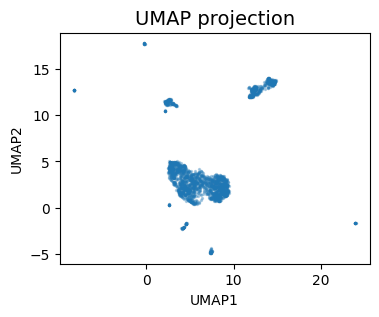

In [194]:
# Plot
point_labels=list(freq.keys())
texts = []
plt.figure(figsize=(4, 3))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=2,alpha=0.3)
#plt.scatter(X_new_umap[:, 0], X_new_umap[:, 1], c='red', marker='*', s=50)
plt.title('UMAP projection', fontsize=14)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#for i, label in enumerate(point_labels):
   # texts.append(
      #  plt.text(X_new_umap[i, 0], X_new_umap[i, 1], str(label), fontsize=10)
  #  )
# 自动调整所有文字，避免重叠
#adjust_text(texts, 
##            only_move={'points': 'y', 'texts': 'y'}, # 可以只上下移动
#            arrowprops=dict(arrowstyle="->", color='gray', lw=0.5)) # 给线加箭头（可选）
plt.savefig(os.path.join(result_path,"umap_projection.pdf"), format='pdf', bbox_inches='tight')  # 保存 PDF 文件
plt.show()

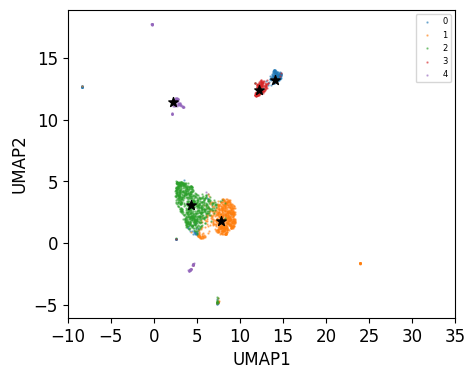

In [195]:
point_labels=[i for i in range(K)]
plt.figure(figsize=(5,4))
plt.xlim(-10, 35)
#plt.scatter(X_umap[:, 0], X_umap[:, 1], s=2, alpha=0.2)
#plt.title('UMAP projection', fontsize=16)
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
labels_train=labels_A
unique_labels = np.unique(labels_train)

for label in unique_labels:
    idx = np.array(labels_train) == label
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], 
                label=label, alpha=0.5,s=0.5)
plt.scatter(X_new_umap[:, 0], X_new_umap[:, 1], c='black', marker='*', s=50)

# 这里假设 point_labels 是一个 list 或 array，长度和 X_new_umap 一样
#for i, label in enumerate(df['Category'].values.tolist()):
#    print(i,label)
 #   plt.text(X_new_umap[label, 0], X_new_umap[label, 1]+1, str(label),
#             fontsize=10, color='black', ha='center', va='center')
plt.legend(fontsize=6)
plt.savefig("umap_projection.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [196]:
pi=pi_all[:,df['Category'].values.tolist()]
pd.DataFrame(pi,columns=df['Category'].values.tolist()).to_csv('/home/qyyuan/project/ST_GRN/PDAC/results/pi_forplot.txt',sep='\t')


In [197]:
adata_ST.obs.to_csv('/home/qyyuan/project/ST_GRN/PDAC/results/location.txt',sep='\t')


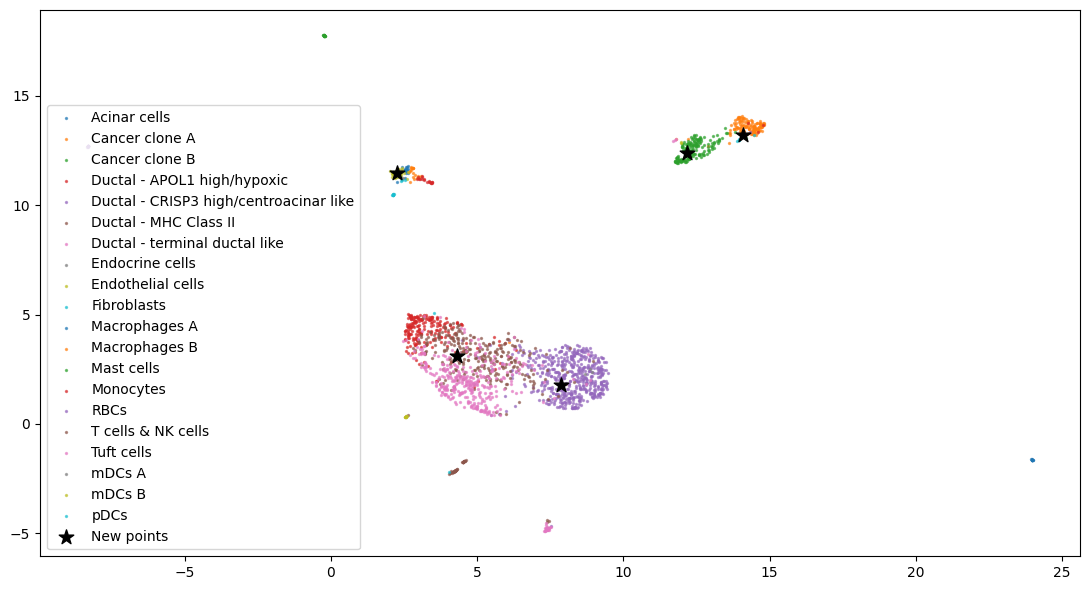

In [198]:
plt.figure(figsize=(11, 6))
labels_train=adata_sc.obs['celltype'].values
unique_labels = np.unique(labels_train)

for label in unique_labels:
    idx = np.array(labels_train) == label
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], 
                label=label, alpha=0.6,s=2)

# 新数据点
plt.scatter(X_new_umap[:, 0], X_new_umap[:, 1], 
            c='black', marker='*', s=120, label='New points')

plt.tight_layout() 
plt.legend()
plt.savefig("umap_projection_celltype.pdf", format='pdf')
plt.show()

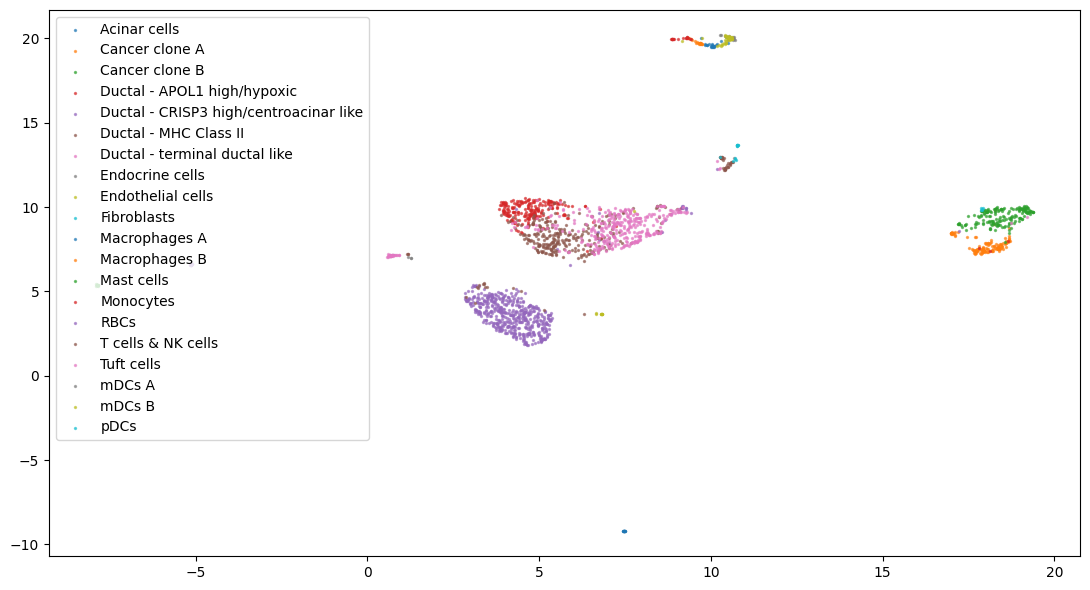

In [93]:
plt.figure(figsize=(11, 6))
labels_train=adata_sc.obs['celltype'].values
unique_labels = np.unique(labels_train)

for label in unique_labels:
    idx = np.array(labels_train) == label
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], 
                label=label, alpha=0.6,s=2)

# 新数据点
#plt.scatter(X_new_umap[:, 0], X_new_umap[:, 1], 
           # c='black', marker='*', s=120, label='New points')

plt.legend()
plt.tight_layout() 
plt.show()

In [199]:
adata=adata_sc.copy()

In [200]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [96]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

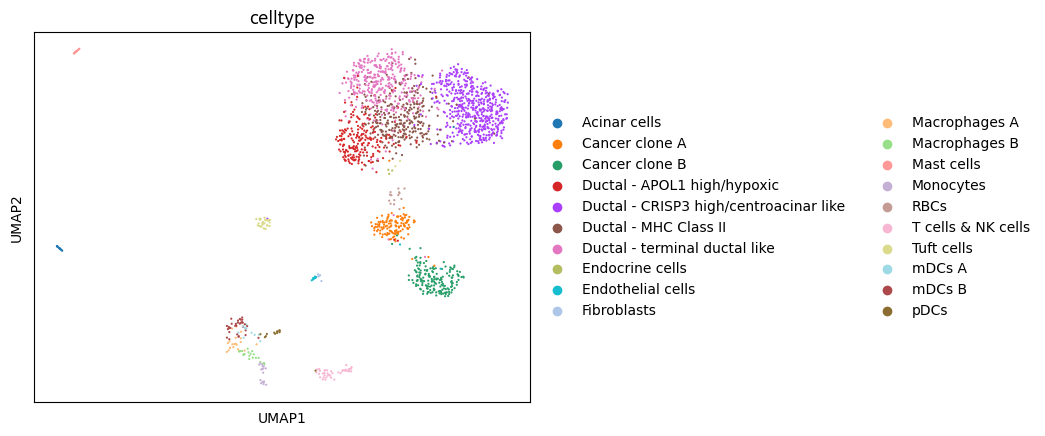

In [99]:
sc.pl.umap(
    adata,
    color="celltype",
    # Setting a smaller point size to get prevent overlap
    size=10,
)

### compare origianl and ours 

## comformal prediction

In [214]:
import torch
import numpy as np

def compute_lambda_test(true_coords, z_B, test_idx, k_neighbors=15):
    """
    输入:
        true_coords: (N_total, d1) 实际空间坐标 (tensor)
        z_B: (N_total, d2) latent 表示 (tensor)
        test_idx: list/array/tensor, 需要计算的样本索引
        k_neighbors: int, 近邻个数
    输出:
        lambda_test: (len(test_idx), 1) numpy array
    """
    # 取测试子集
    coords_sub = true_coords[test_idx, :]
    z_sub = z_B[test_idx, :]
    
    # 距离矩阵
    dist_matrix_spatial = torch.cdist(coords_sub, coords_sub)
    dist_matrix_latent = torch.cdist(z_sub, z_sub)
    
    N = dist_matrix_spatial.shape[0]
    lambda_test = np.zeros((N, 1))
    
    for i in range(N):
        dists = dist_matrix_spatial[i].clone()
        dists[i] = float('inf')  # 不考虑自己
        dists_k, indices_k = torch.topk(dists, k_neighbors, largest=False)
        lambda_test[i, 0] = dist_matrix_latent[i, indices_k].mean().item()
    
    return lambda_test

In [215]:
def conformal_prediction(true_coords,z_B,m_B,calib_index,test_index,alpha=0.05, k_neighbors=15):
        """
        执行Conformal Prediction检测空间异常细胞
        参数:
            alpha: 显著性水平 (默认0.05对应95%置信区间)
            k_neighbors: 计算λ时的最近邻数量
        返回:
            aberrant: 布尔数组，标记哪些spot是异常的
            confidence_intervals: 每个spot的置信区间半径
        """
        # 获取ST数据的预测坐标和真实坐标
        # x_B = torch.from_numpy(self.emb_B).float().to(self.device)
        # z_B = self.E_B(x_B)
        # print(z_B.shape)
        # m_B = self.E_s(z_B)
        pred_coords = m_B.copy()
        true_coords = true_coords
        # 转换为tensor
        pred_coords = torch.from_numpy(pred_coords).float()
        true_coords = torch.from_numpy(true_coords).float()
        z_B = torch.from_numpy(z_B).float()
        # 随机划分测试集和校准集 (50-50)
        test_idx =  test_index
        calib_idx = calib_index
        # 计算测试集的非一致性分数
        lambda_test = torch.from_numpy(compute_lambda_test(true_coords, z_B, test_idx, k_neighbors=15)).view(-1)
        lambda_calib = torch.from_numpy(compute_lambda_test(true_coords, z_B, calib_idx, k_neighbors=15)).view(-1)
        # lambda_test = dist_matrix.topk(k_neighbors+1, largest=False).values[:, 1:].mean(dim=1)# 因为有自己
        # print(lambda_test.shape)
        v_test = torch.norm(true_coords[test_idx] - pred_coords[test_idx], dim=1) / lambda_test
        # 计算分位数
        q = np.quantile(v_test.detach().numpy(), 1 - alpha)
        # 为校准集计算λ和置信区间
        # lambda_calib = dist_calib_to_test.topk(k_neighbors, largest=False).values.mean(dim=1)
        # print(dist_calib_to_test.topk(k_neighbors, largest=False).values)
        # print(lambda_calib.shape)
        confidence_intervals = q * lambda_calib
        # 检测异常点
        pred_errors = torch.norm(true_coords[calib_idx,:] - pred_coords[calib_idx], dim=1)
        aberrant = pred_errors > confidence_intervals 
        # 交换测试集和校准集再计算一次 (论文中的完整流程)
        dist_matrix = torch.cdist(true_coords[calib_idx], true_coords[calib_idx])
        #lambda_calib = dist_matrix.topk(k_neighbors+1, largest=False).values[:, 1:].mean(dim=1)
        v_calib = torch.norm(true_coords[calib_idx] - pred_coords[calib_idx], dim=1) / lambda_calib
        q = np.quantile(v_calib.numpy(), 1 - alpha)   
        confidence_intervals_test = q * lambda_test
        pred_errors_test = torch.norm(true_coords[test_idx] - pred_coords[test_idx], dim=1)
        aberrant_test = pred_errors_test > confidence_intervals_test      
        # 合并两次结果
        n = true_coords.shape[0]
        final_aberrant = torch.zeros(n, dtype=torch.bool)
        # print(aberrant.shape)
        final_aberrant[calib_idx] = aberrant
        final_aberrant[test_idx] = aberrant_test
        final_lambda_calib=torch.zeros(n)
        final_confidence = torch.zeros(n)
        final_lambda_calib[calib_idx]=lambda_calib.float()
        # print(final_lambda_calib.shape,lambda_test.shape,lambda_calib.shape)
        final_lambda_calib[test_idx] = lambda_test.float()
        final_confidence[calib_idx] = confidence_intervals.float()
        final_confidence[test_idx] = confidence_intervals_test.float()  
        # print(f"Detected {final_aberrant.sum().item()} aberrant spots (alpha={alpha})")       
        return final_aberrant.numpy(), final_confidence.detach().numpy(),final_lambda_calib,pred_coords,true_coords

In [210]:
temp=adata_ST.obsm['spatial']
true_coords=(temp-temp.min(axis=0))/(temp.max(axis=0)-temp.min(axis=0))


In [211]:
N=temp.shape[0]
import random
samples = list(range(N ))

# 随机抽取一半
part1 = random.sample(samples, N // 2)
# 剩下的就是另一半
part2 = [x for x in samples if x not in part1]

print("Part 1:", part1)
print("Part 2:", part2)

calib_index=part1
test_index=part2

Part 1: [298, 106, 372, 336, 424, 135, 384, 85, 146, 310, 82, 201, 97, 288, 13, 339, 111, 360, 130, 71, 138, 5, 270, 274, 204, 29, 235, 48, 332, 161, 175, 263, 88, 317, 105, 132, 299, 215, 305, 169, 77, 18, 108, 328, 56, 155, 256, 333, 211, 35, 297, 351, 426, 191, 136, 365, 51, 302, 291, 286, 186, 11, 394, 2, 259, 352, 109, 81, 381, 393, 404, 388, 334, 324, 183, 158, 240, 314, 330, 152, 230, 254, 226, 114, 224, 74, 413, 318, 383, 375, 405, 34, 208, 167, 382, 257, 225, 385, 107, 389, 265, 279, 80, 14, 214, 150, 0, 199, 54, 66, 307, 10, 173, 370, 141, 50, 190, 386, 165, 219, 49, 184, 37, 67, 349, 131, 68, 178, 392, 23, 425, 294, 194, 43, 76, 252, 337, 427, 103, 41, 157, 329, 172, 72, 340, 268, 207, 364, 397, 379, 149, 348, 112, 98, 102, 113, 366, 419, 160, 19, 258, 147, 390, 350, 237, 78, 193, 154, 26, 42, 73, 91, 179, 285, 223, 32, 367, 280, 156, 322, 151, 123, 198, 197, 407, 421, 117, 231, 255, 92, 177, 168, 246, 3, 9, 227, 355, 271, 293, 391, 21, 396, 115, 312, 319, 354, 345, 39, 415,

In [216]:
final_aberrant, final_confidence,lambda_calib,pred_coords,true_coords=conformal_prediction(true_coords,z_B,m_B,calib_index,test_index,alpha=0.05, k_neighbors=15)

In [219]:
import pandas as pd

# 假设这些变量已经是 pandas DataFrame 或 Series
# 如果不是，需要先转换为 DataFrame

# 示例：如果变量是 numpy 数组或其他类型，可以这样转换
final_aberrant = pd.DataFrame(final_aberrant)
final_confidence = pd.DataFrame(final_confidence)
lambda_calib = pd.DataFrame(lambda_calib)
pred_coords = pd.DataFrame(pred_coords)
true_coords = pd.DataFrame(true_coords)

# 保存为 CSV 文件
final_aberrant.to_csv(result_path+'final_aberrant.csv', index=False)
final_confidence.to_csv(result_path+'final_confidence.csv', index=False)
lambda_calib.to_csv(result_path+'lambda_calib.csv', index=False)
pred_coords.to_csv(result_path+'pred_coords.csv', index=False)
true_coords.to_csv(result_path+'true_coords.csv', index=False)

## check the result

In [ ]:
import pandas as pd

In [ ]:
original=pd.read_csv('prediction_cross_orginal0.txt',index_col=0)

In [ ]:
original

In [ ]:
original_adv=pd.read_csv('prediction_cross_orginal.txt',index_col=0)

In [ ]:
original_adv